In [ ]:
%matplotlib inline

In [ ]:
pip install Cython

In [ ]:

import numpy as np 
import pandas as pd 
import os



In [ ]:
!pip install fastai -q --upgrade

     |████████████████████████████████| 189 kB 5.4 MB/s 
     |████████████████████████████████| 56 kB 3.8 MB/s 


In [ ]:
from fastai import *
from fastai.vision import *
from fastai.vision.gan import *

import os
from os import listdir


In [ ]:
import fastai
print(fastai.__version__)
from fastai.vision.all import *
from pathlib import Path

2.5.3


In [ ]:
from fastai.vision.all import *


set_seed(42) 

In [ ]:
import pandas as pd
import numpy as np
import keras

from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.preprocessing.image import ImageDataGenerator, array_to_img
from keras.models import Sequential
from keras.layers import Dense, Dropout, InputLayer, Conv2D, MaxPool2D, Activation, Flatten, BatchNormalization

from keras.utils import np_utils
from tensorflow.keras.optimizers import Adam
from keras.optimizers import gradient_descent_v2 
from tensorflow.keras.optimizers import RMSprop

In [ ]:
pip install git+https://github.com/tensorflow/examples.git

  Cloning https://github.com/tensorflow/examples.git to /tmp/pip-req-build-hdouny89
  Running command git clone -q https://github.com/tensorflow/examples.git /tmp/pip-req-build-hdouny89


In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download humansintheloop/plant-semantic-segmentation

 99% 1.37G/1.38G [00:11<00:00, 118MB/s]
100% 1.38G/1.38G [00:11<00:00, 127MB/s]


In [ ]:
!unzip plant-semantic-segmentation

Archive:  plant-semantic-segmentation.zip
  inflating: Plant segmentation/images/T02_Box007_2017-09-04T07-12-53-482.png  
  inflating: Plant segmentation/images/T02_Box007_2017-09-04T10-46-12-638.png  
  inflating: Plant segmentation/images/T02_Box007_2017-09-04T13-12-49-447.png  
  inflating: Plant segmentation/images/T02_Box007_2017-09-05T09-21-20-473.png  
  inflating: Plant segmentation/images/T02_Box007_2017-09-06T10-42-48-553.png  
  inflating: Plant segmentation/images/T02_Box007_2017-09-07T10-49-33-224.png  
  inflating: Plant segmentation/images/T02_Box007_2017-09-09T08-52-40-045.png  
  inflating: Plant segmentation/images/T02_Box007_2017-09-10T05-55-35-248.png  
  inflating: Plant segmentation/images/T02_Box007_2017-09-11T10-38-11-116.png  
  inflating: Plant segmentation/images/T02_Box007_2017-09-12T09-15-11-694.png  
  inflating: Plant segmentation/images/T02_Box007_2017-09-13T06-44-53-948.png  
  inflating: Plant segmentation/images/T02_Box007_2017-09-14T08-17-35-120.png 

In [ ]:
import tensorflow as tf
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12210684329017599053
xla_global_id: -1
]


In [ ]:
from tensorflow_examples.models.pix2pix import pix2pix

import tensorflow_datasets as tfds

from IPython.display import clear_output
import matplotlib.pyplot as plt


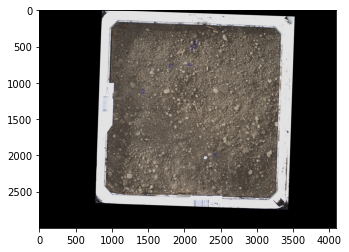

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
im = np.array(Image.open('/content/Plant segmentation/images/T02_Box007_2017-09-04T07-12-53-482.png'))

plt.imshow(im)

In [ ]:
train_generator = ImageDataGenerator(
    rotation_range = 80,
    zoom_range = 0.5,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.2,
    vertical_flip = True,
    horizontal_flip = True,
    
train_generator = train_generator.flow_from_directory(
        directory = '/content/Plant segmentation',
        target_size = (256, 256),
        batch_size = 32,
        color_mode = 'rgb',
        class_mode = "categorical",
        subset ='training'
)

Found 288 images belonging to 2 classes.


In [ ]:
test_generator = ImageDataGenerator()
test_generator = test_generator.flow_from_directory(
        directory='/content/Plant segmentation',
        classes=['test'],
        target_size=(256, 256),
        batch_size=1,
        color_mode='rgb',
        shuffle=False,
        class_mode="categorical"
)

Found 0 images belonging to 1 classes.


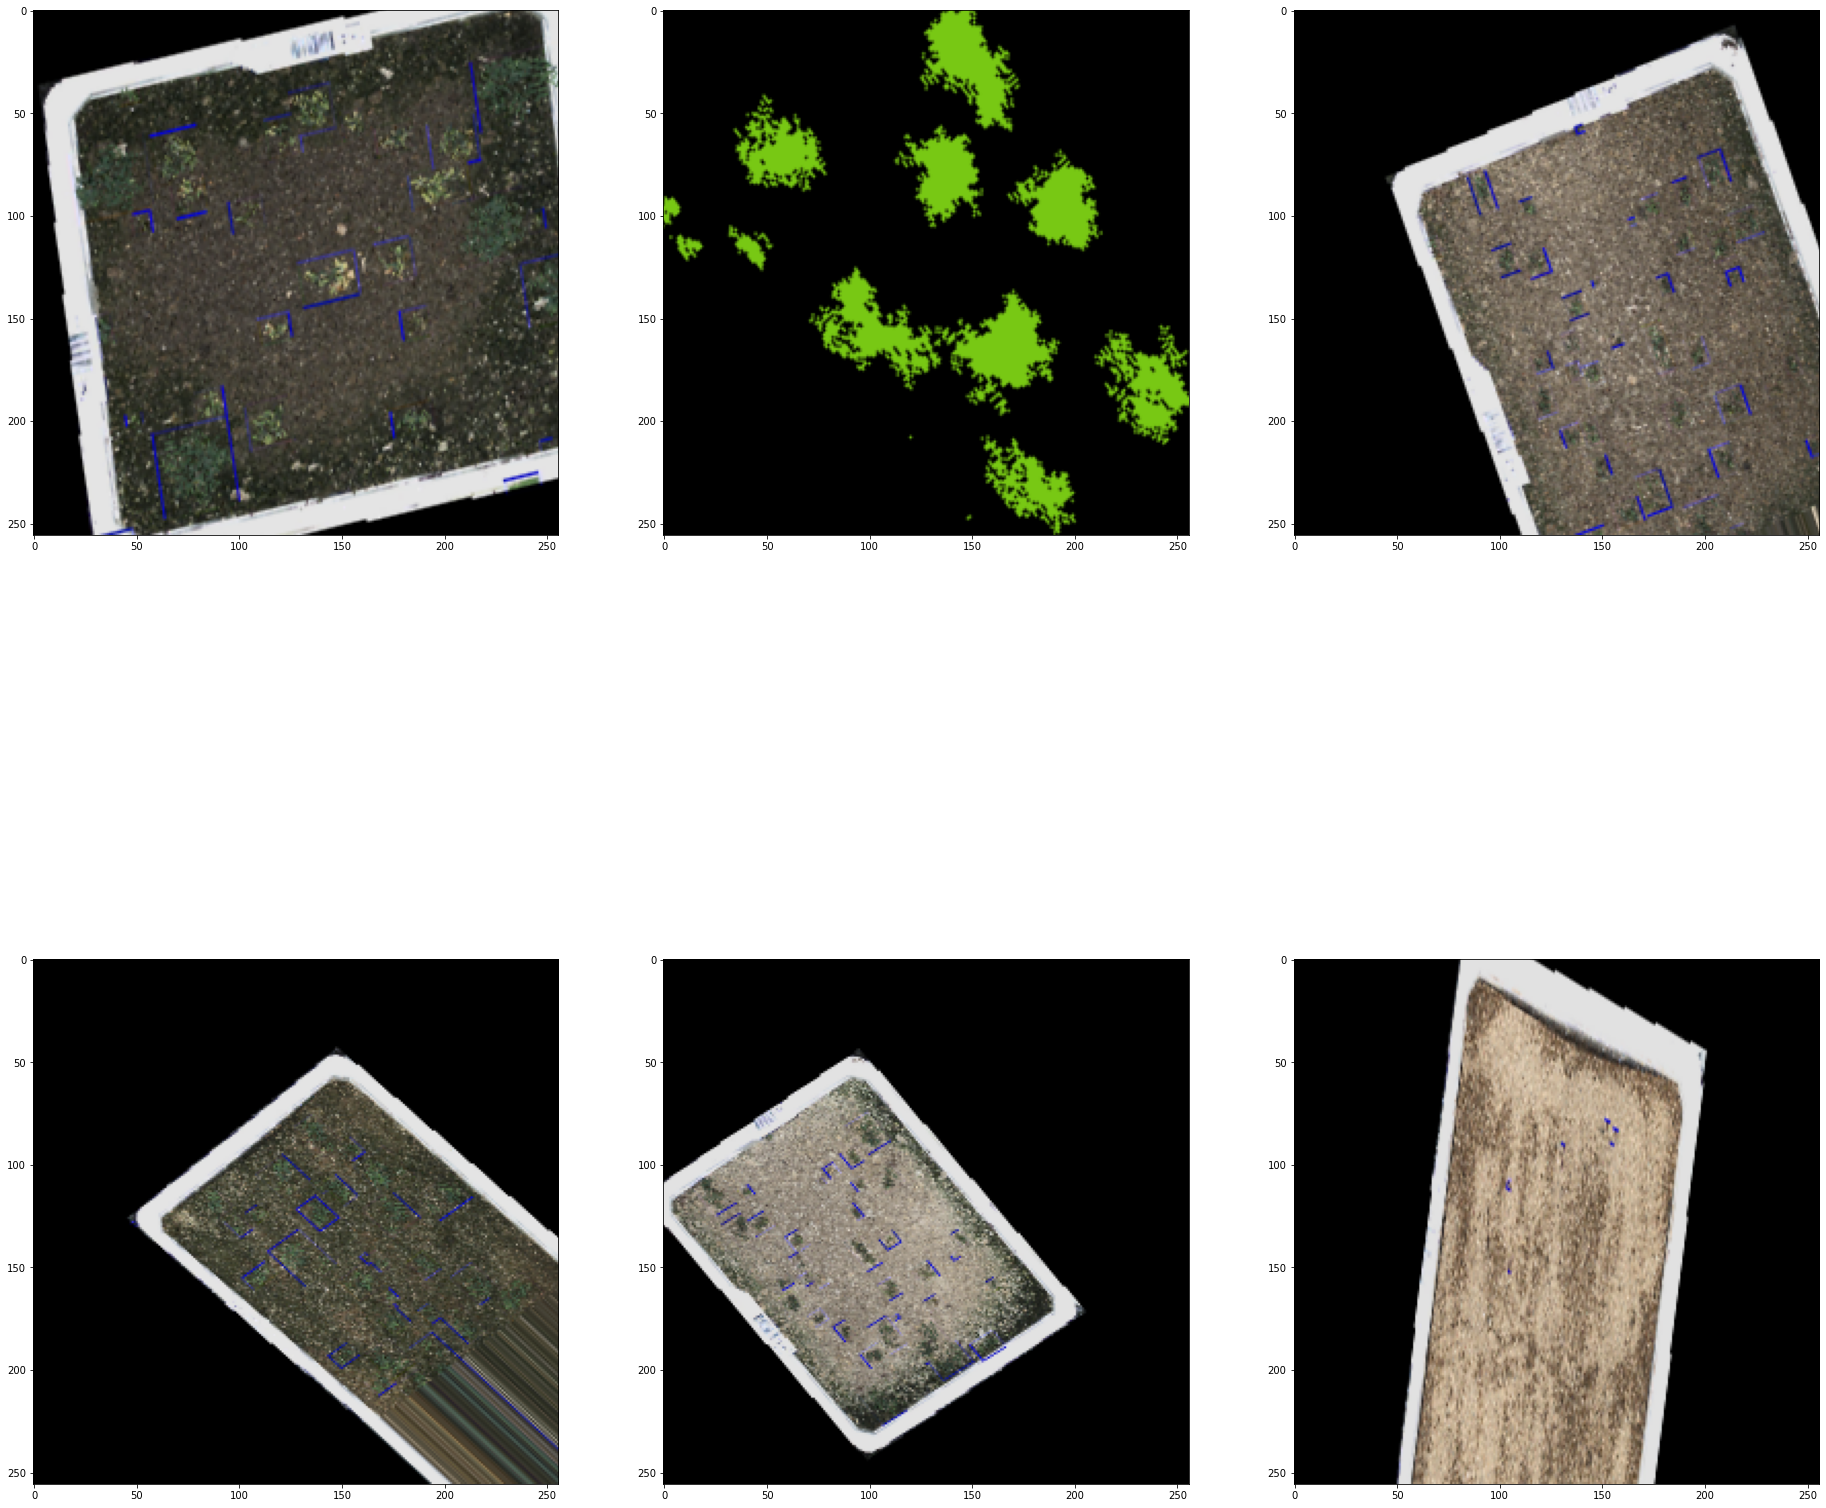

In [ ]:
plt.figure(figsize=(32,32))
for i in range(6):
    batches = next(train_generator)
    
    gen_img = batches[0][i].astype(np.uint8)
    
    plt.subplot(2, 3, i + 1)
    plt.imshow(gen_img)

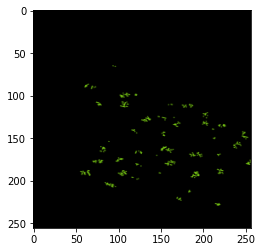

In [ ]:
img = train_generator[0][0][1].astype(np.uint8)

plt.imshow(img)

In [ ]:
len(os.listdir('/content/Plant segmentation/images'))
len(os.listdir('/content/Plant segmentation/masks'))

144

In [ ]:
os.listdir()

['.config',
 'models',
 'kaggle.json',
 'fruits-360_dataset',
 'plant-semantic-segmentation.zip',
 'Plant segmentation',
 'fruits-360-original-size',
 'fruits.zip',
 'sample_data']

In [ ]:
OUTPUT_CHANNELS = 3

In [ ]:
base_model = tf.keras.applications.MobileNetV2(input_shape=[128, 128, 3], include_top=False)


layer_names = [
    'block_1_expand_relu',  
    'block_3_expand_relu',   
    'block_6_expand_relu',   
    'block_13_expand_relu',  
    'block_16_project',      
]
base_model_outputs = [base_model.get_layer(name).output for name in layer_names]


down_stack = tf.keras.Model(inputs=base_model.input, outputs=base_model_outputs)

down_stack.trainable = False

9420800/9406464 [==============================] - 0s 0us/step


In [ ]:
up_stack = [
    pix2pix.upsample(512, 3),  
    pix2pix.upsample(256, 3),  
    pix2pix.upsample(128, 3),  
    pix2pix.upsample(64, 3),   
]

In [ ]:
def unet_model(output_channels):
  inputs = tf.keras.layers.Input(shape=[128, 128, 3])

  
  skips = down_stack(inputs)
  x = skips[-1]
  skips = reversed(skips[:-1])

  
  for up, skip in zip(up_stack, skips):
    x = up(x)
    concat = tf.keras.layers.Concatenate()
    x = concat([x, skip])

  
  last = tf.keras.layers.Conv2DTranspose(
      output_channels, 3, strides=2,
      padding='same')  

  x = last(x)

  return tf.keras.Model(inputs=inputs, outputs=x)

In [ ]:
model = unet_model(OUTPUT_CHANNELS)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

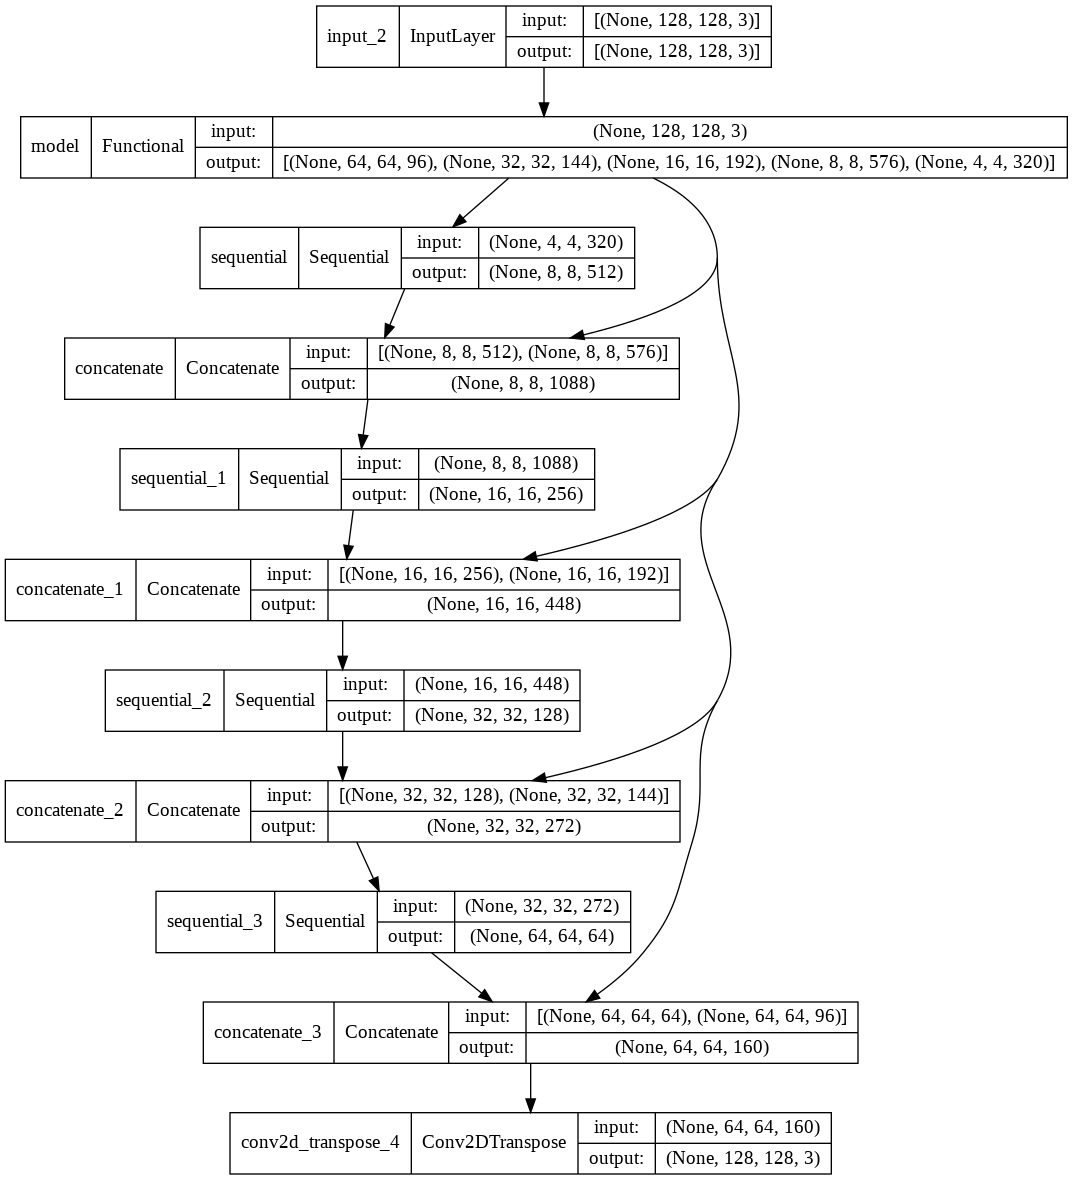

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
label = [0,0]
prediction = [[-3., 0], [-3, 0]] 
sample_weight = [1, 10] 

loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True,
                                               reduction=tf.losses.Reduction.NONE)
loss(label, prediction, sample_weight).numpy()

array([ 3.0485873, 30.485874 ], dtype=float32)

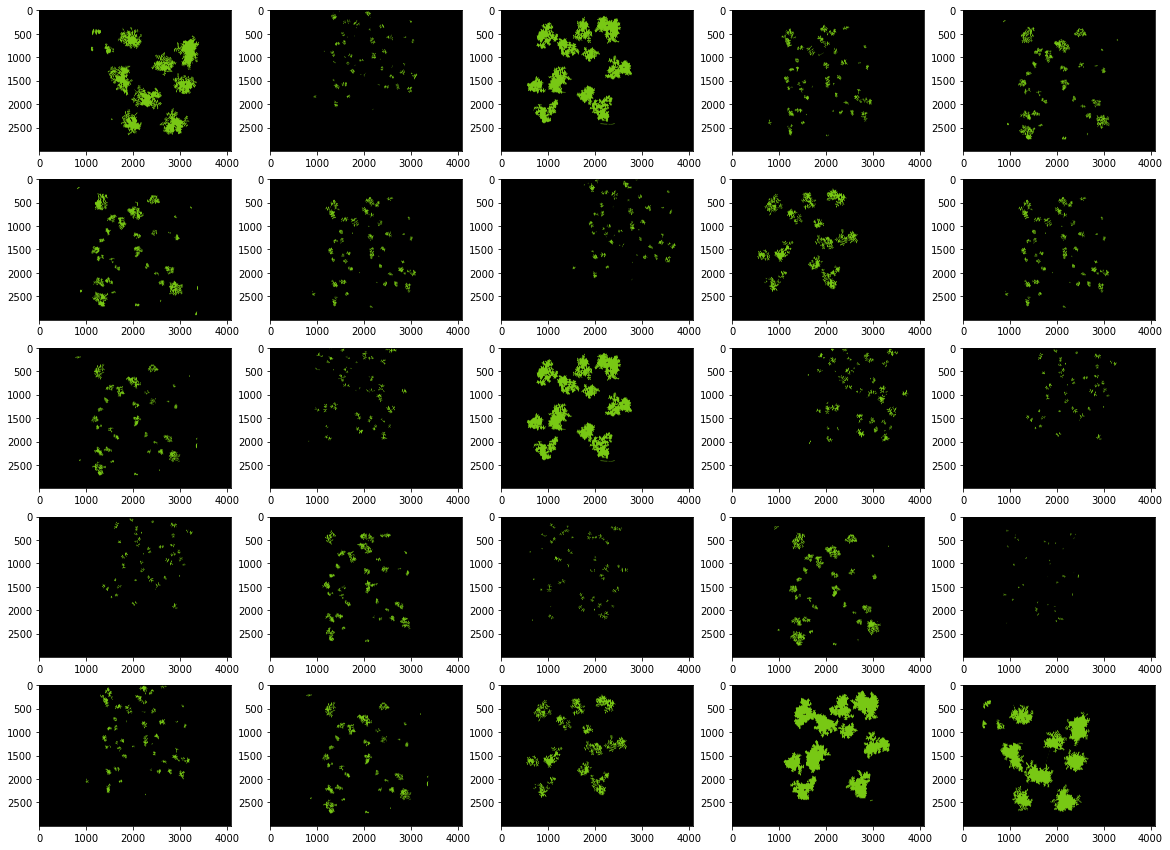

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
import cv2 as cv
from keras.preprocessing.image import load_img
for i in range(25):
    j=np.random.choice((os.listdir('/content/Plant segmentation/images')))
    plt.subplot(5,5,i+1)
    img=load_img(os.path.join('/content/Plant segmentation/masks',j))
    plt.imshow(img)

In [ ]:
ResNetV2 = InceptionResNetV2(include_top=False, weights='imagenet', pooling='avg', input_shape=(256,256,3))
ResNetV2.output_shape

219070464/219055592 [==============================] - 2s 0us/step


(None, 1536)

In [ ]:
model_conv = Sequential([
      ResNetV2,
      Dense(128, activation = 'swish'),
      
      Dense(12, activation = 'softmax')
])

adam = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model_conv.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_conv.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 dense_16 (Dense)            (None, 128)               196736    
                                                                 
 dense_17 (Dense)            (None, 12)                1548      
                                                                 
Total params: 54,535,020
Trainable params: 54,474,476
Non-trainable params: 60,544
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
epochs = 5
batch_size = 32
history = model_conv.fit(train_generator, batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/5


InvalidArgumentError: ignored

In [ ]:


path = Path('/content/fruits-360_dataset/fruits-360/Training')

In [ ]:
os.listdir(path)

['Chestnut',
 'Pepper Orange',
 'Eggplant',
 'Pear Stone',
 'Limes',
 'Avocado ripe',
 'Cherry 2',
 'Apple Golden 3',
 'Tomato 4',
 'Kohlrabi',
 'Mangostan',
 'Nectarine Flat',
 'Pear Williams',
 'Tomato 1',
 'Physalis',
 'Pear Monster',
 'Plum 3',
 'Tomato 3',
 'Cauliflower',
 'Beetroot',
 'Mulberry',
 'Banana Red',
 'Nut Pecan',
 'Apple Red Yellow 1',
 'Watermelon',
 'Redcurrant',
 'Pear Red',
 'Tamarillo',
 'Apple Red 1',
 'Kumquats',
 'Potato Sweet',
 'Kaki',
 'Tomato Yellow',
 'Apple Red Yellow 2',
 'Potato White',
 'Raspberry',
 'Pepper Yellow',
 'Grape White 4',
 'Peach 2',
 'Hazelnut',
 'Grape Pink',
 'Potato Red Washed',
 'Grape White 2',
 'Papaya',
 'Banana Lady Finger',
 'Cucumber Ripe',
 'Pear Abate',
 'Pomegranate',
 'Guava',
 'Grapefruit White',
 'Peach Flat',
 'Grape White',
 'Peach',
 'Kiwi',
 'Pepino',
 'Banana',
 'Tomato Heart',
 'Nectarine',
 'Grapefruit Pink',
 'Potato Red',
 'Pitahaya Red',
 'Walnut',
 'Passion Fruit',
 'Apple Braeburn',
 'Pear Forelle',
 'Plum',
 

In [ ]:
def get_dls(bs, size):
    dblock = DataBlock(blocks = (ImageBlock, CategoryBlock),
                       get_items = get_image_files,
                       get_y = parent_label,
                       splitter = RandomSplitter(),
                       item_tfms = Resize(size)
                      )
    return dblock.dataloaders(path, bs = bs)

In [ ]:
dls = get_dls(16, 32)

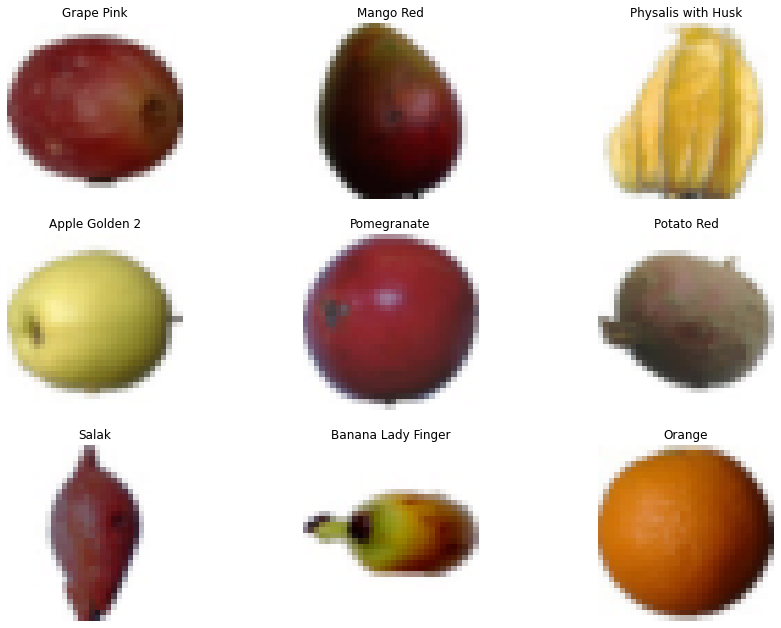

In [ ]:
dls.show_batch(figsize=(15,11))

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=[accuracy, error_rate])

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

SuggestedLRs(valley=0.0020892962347716093)

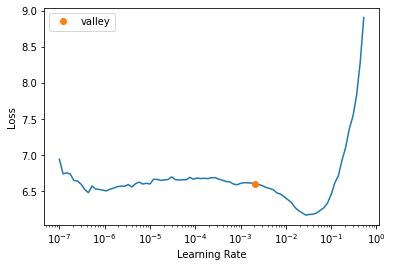

In [ ]:
learn.lr_find()

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=[accuracy, error_rate])
learn.fit_one_cycle(10,1e-3)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.139247,0.275914,0.934407,0.065593,18:08
1,0.397935,0.030101,0.991579,0.008421,18:24
2,0.199589,0.019373,0.995937,0.004063,18:36
3,0.126224,0.005251,0.998523,0.001477,18:27
4,0.074474,0.000822,0.999926,0.000074,18:44
5,0.056733,0.000667,0.999926,0.000074,18:52
6,0.034528,0.000228,1.000000,0.000000,18:31
7,0.014083,0.000033,1.000000,0.000000,18:29


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.139247,0.275914,0.934407,0.065593,18:08
1,0.397935,0.030101,0.991579,0.008421,18:24
2,0.199589,0.019373,0.995937,0.004063,18:36
3,0.126224,0.005251,0.998523,0.001477,18:27
4,0.074474,0.000822,0.999926,0.000074,18:44
5,0.056733,0.000667,0.999926,0.000074,18:52
6,0.034528,0.000228,1.000000,0.000000,18:31
7,0.014083,0.000033,1.000000,0.000000,18:29
8,0.020092,0.000035,1.000000,0.000000,18:23
9,0.028409,0.000052,1.000000,0.000000,18:26


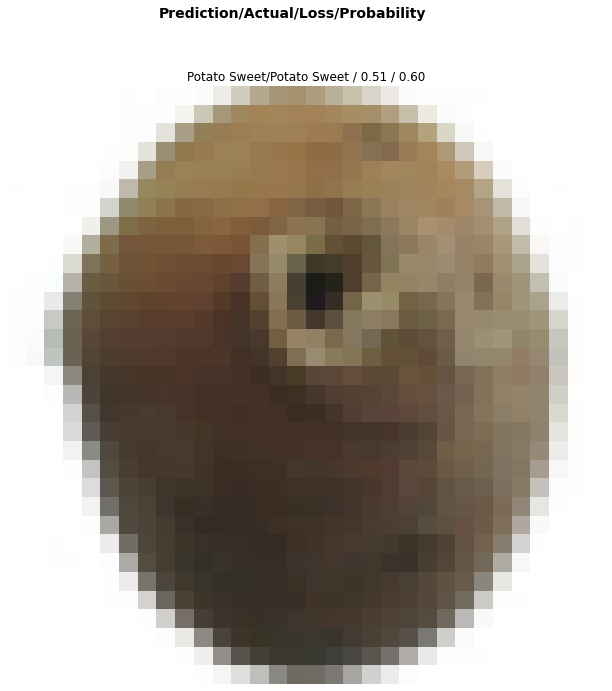

In [ ]:
interpretation = ClassificationInterpretation.from_learner(learn)
losses, indices = interpretation.top_losses()
interpretation.plot_top_losses(1, figsize=(15,11))

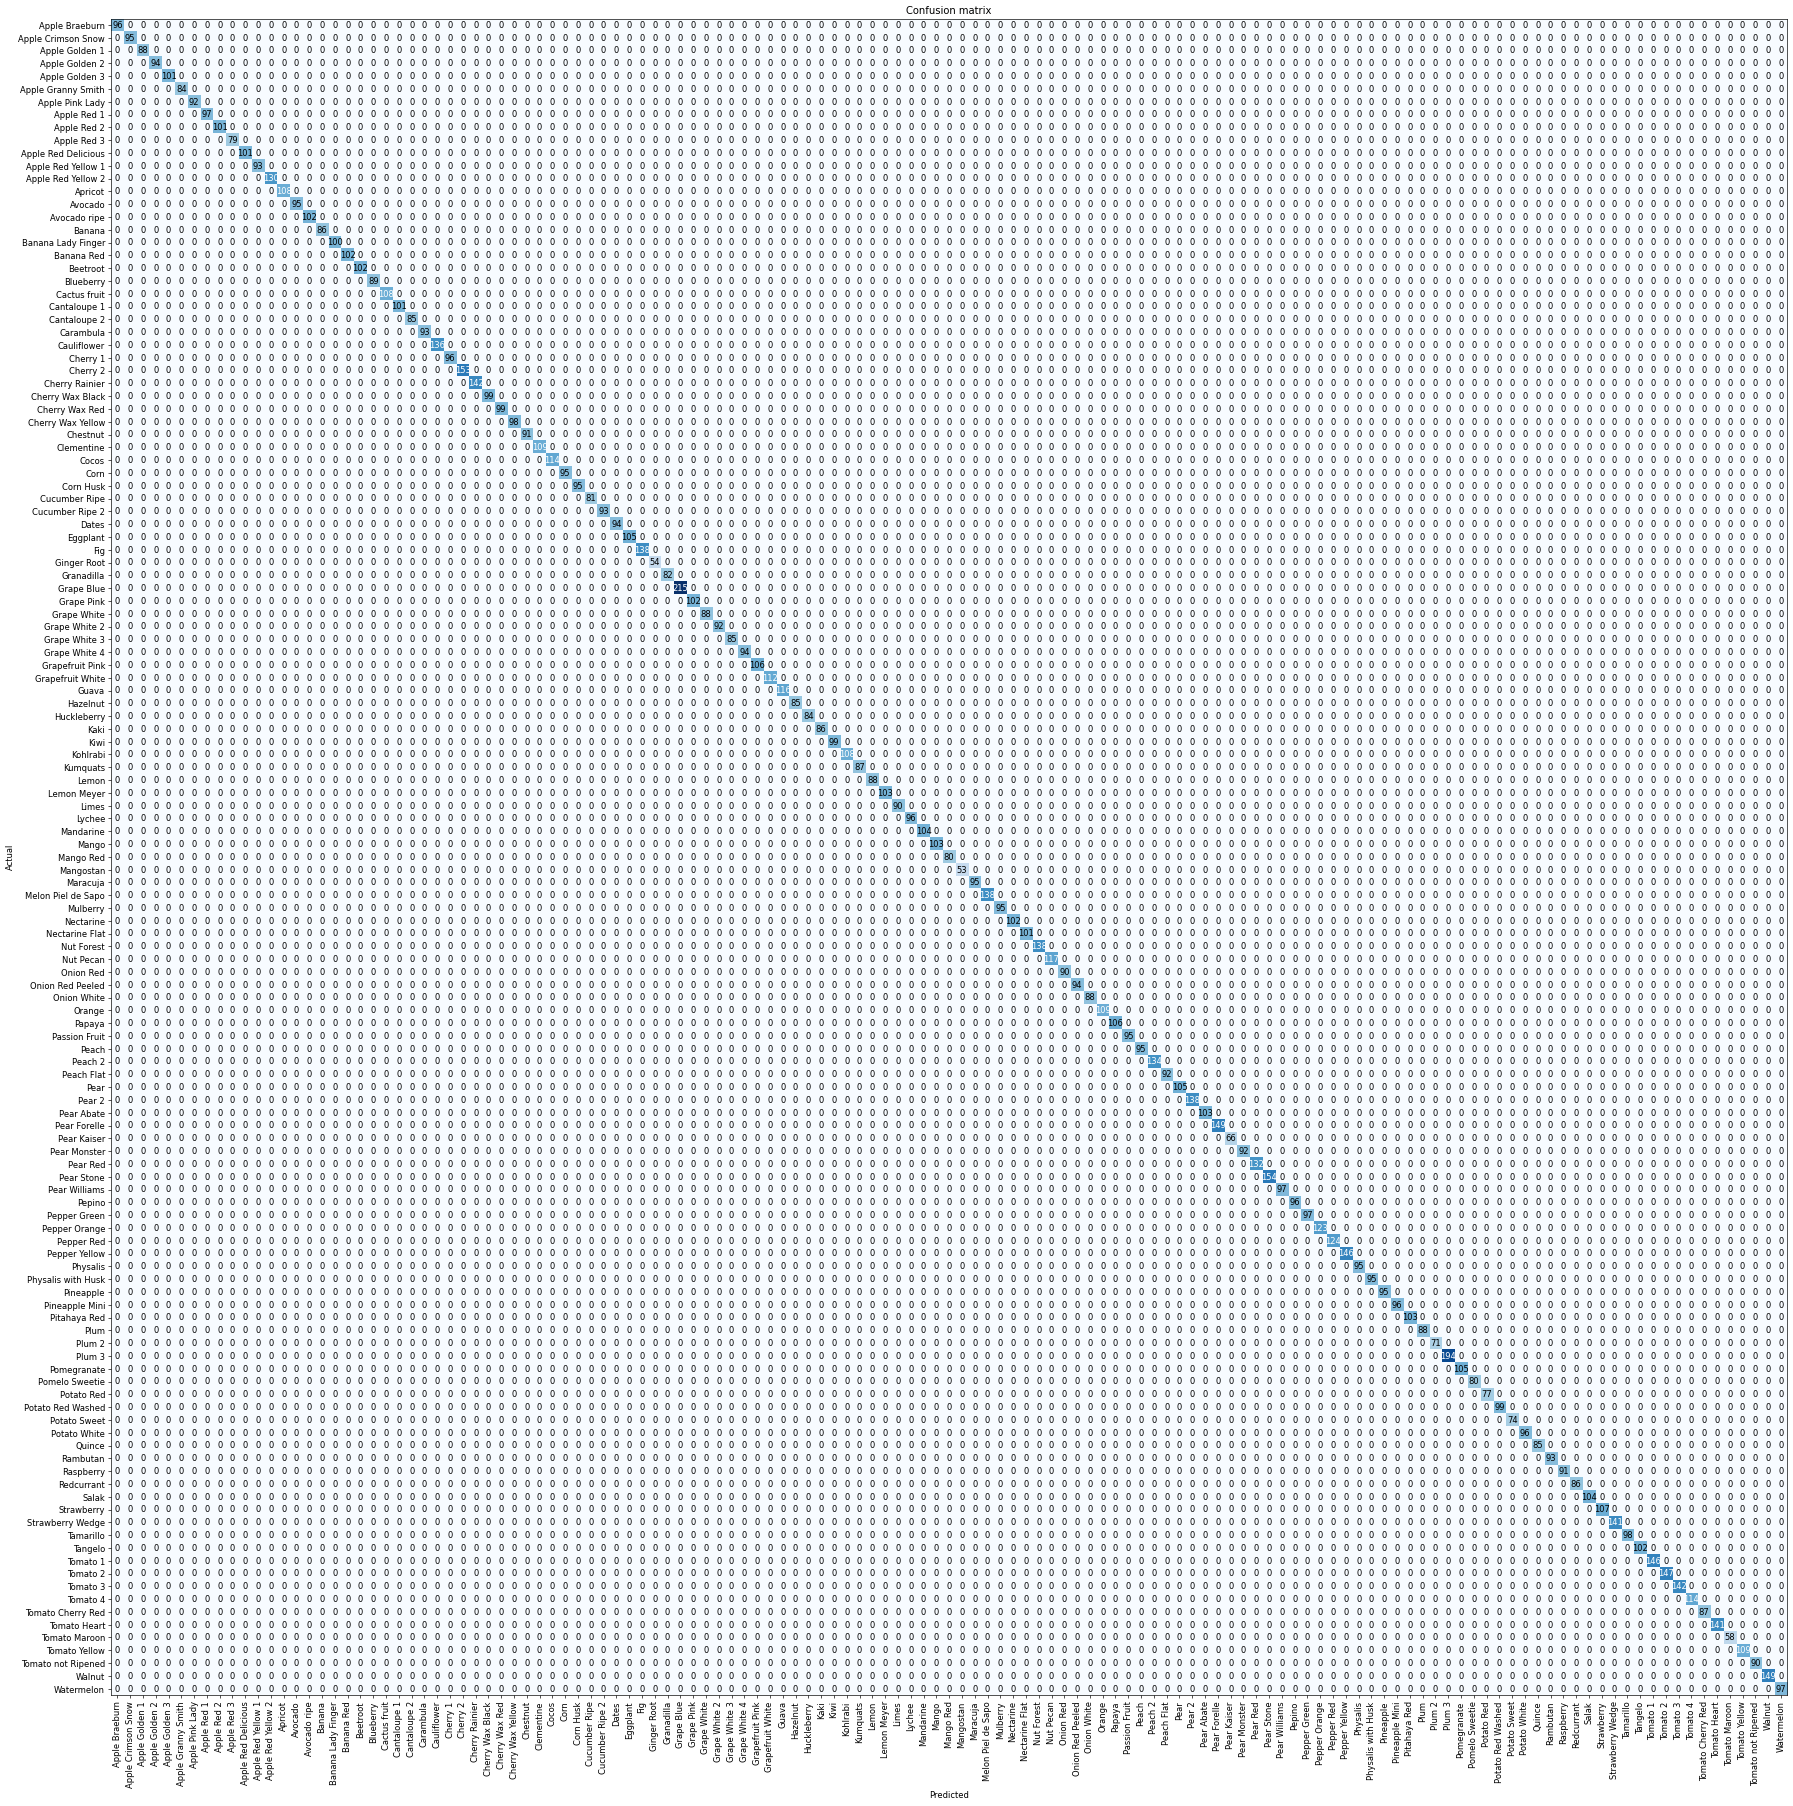

In [ ]:
interpretation.plot_confusion_matrix(figsize=(30,30), dpi=60)

In [ ]:
interpretation.most_confused(min_val=2)

[]

In [ ]:
learn.save('classification-1')